In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
os.getcwd()
os.chdir('C:/Users/ctran/Documents/DSC_projects/ufc/UFC-Predictions/data')

In [2]:
data = pd.read_csv('data.csv')
preprocessed = pd.read_csv('preprocessed_data.csv')
raw_details = pd.read_csv('raw_fighter_details.csv')
raw_total_data = pd.read_csv('raw_total_fight_data.csv')


In [3]:
data['date'] = pd.to_datetime(data.date)
data = data[~data.Winner.isna()]
data[(data.R_fighter.str.contains('Cannonier')) | (data.B_fighter.str.contains('Cannonier'))].sort_values(by='date')


,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Stance,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
4065,Shawn Jordan,Jared Cannonier,John McCarthy,2015-01-03,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Switch,180.34,195.58,185.0,0.062500,0.375000,0.483750,0.398594,0.406250,0.005000,0.000000,0.015625,0.00000,0.000000,44.968750,23.171875,50.437500,18.953125,76.359375,47.671875,52.875000,20.781250,2.640625,1.562500,0.234375,0.031250,39.578125,19.078125,42.015625,13.656250,3.796875,2.500000,5.046875,3.171875,1.593750,1.593750,3.375000,2.125000,24.703125,9.375000,37.875000,11.218750,4.140625,1.812500,11.812500,7.234375,16.125000,11.984375,0.750000,0.500000,176.312500,18.187500,490.453125,13,0,1,0,2,4,3,0,0,0,0,4,0,0,Southpaw,182.88,190.50,260.0,30.0,30.0
3495,Jared Cannonier,Cyril Asker,Grant Waterman,2016-04-10,"Zagreb, Croatia",Red,False,Heavyweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Orthodox,182.88,187.96,247.0,0.000000,1.000000,0.500000,0.380000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,20.000000,10.000000,31.000000,12.000000,20.0000

# Right away we notice that for first time UFC fighters there is no data about them, and thus don't have any informative information to make a prediction

In [4]:
data.describe()

,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,B_avg_REV,B_avg_opp_REV,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_opp_SIG_STR_att,B_avg_opp_SIG_STR_landed,B_avg_TOTAL_STR_att,B_avg_TOTAL_STR_landed,B_avg_opp_TOTAL_STR_att,B_avg_opp_TOTAL_STR_landed,B_avg_TD_att,B_avg_TD_landed,B_avg_opp_TD_att,B_avg_opp_TD_landed,B_avg_HEAD_att,B_avg_HEAD_landed,B_avg_opp_HEAD_att,B_avg_opp_HEAD_landed,B_avg_BODY_att,B_avg_BODY_landed,B_avg_opp_BODY_att,B_avg_opp_BODY_landed,B_avg_LEG_att,B_avg_LEG_landed,B_avg_opp_LEG_att,B_avg_opp_LEG_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,B_avg_opp_DISTANCE_att,B_avg_opp_DISTANCE_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_opp_CLINCH_att,B_avg_opp_CLINCH_landed,B_avg_GROUND_att,B_avg_GROUND_landed,B_avg_opp_GROUND_att,B_avg_opp_GROUND_landed,B_avg_CTRL_time(seconds),B_avg_opp_CTRL_time(seconds),B_total_time_fought(seconds),B_total_rounds_fought,B_total_title_bouts,B_current_win_streak,B_current_lose_streak,B_longest_win_streak,B_wins,B_losses,B_draw,B_win_by_Decision_Majority,B_win_by_Decision_Split,B_win_by_Decision_Unanimous,B_win_by_KO/TKO,B_win_by_Submission,B_win_by_TKO_Doctor_Stoppage,B_Height_cms,B_Reach_cms,B_Weight_lbs,R_avg_KD,R_avg_opp_KD,R_avg_SIG_STR_pct,R_avg_opp_SIG_STR_pct,R_avg_TD_pct,R_avg_opp_TD_pct,R_avg_SUB_ATT,R_avg_opp_SUB_ATT,R_avg_REV,R_avg_opp_REV,R_avg_SIG_STR_att,R_avg_SIG_STR_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_TOTAL_STR_att,R_avg_TOTAL_STR_landed,R_avg_opp_TOTAL_STR_att,R_avg_opp_TOTAL_STR_landed,R_avg_TD_att,R_avg_TD_landed,R_avg_opp_TD_att,R_avg_opp_TD_landed,R_avg_HEAD_att,R_avg_HEAD_landed,R_avg_opp_HEAD_att,R_avg_opp_HEAD_landed,R_avg_BODY_att,R_avg_BODY_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_LEG_att,R_avg_LEG_landed,R_avg_opp_LEG_att,R_avg_opp_LEG_landed,R_avg_DISTANCE_att,R_avg_DISTANCE_landed,R_avg_opp_DISTANCE_att,R_avg_opp_DISTANCE_landed,R_avg_CLINCH_att,R_avg_CLINCH_landed,R_avg_opp_CLINCH_att,R_avg_opp_CLINCH_landed,R_avg_GROUND_att,R_avg_GROUND_landed,R_avg_opp_GROUND_att,R_avg_opp_GROUND_landed,R_avg_CTRL_time(seconds),R_avg_opp_CTRL_time(seconds),R_total_time_fought(seconds),R_total_rounds_fought,R_total_title_bouts,R_current_win_streak,R_current_lose_streak,R_longest_win_streak,R_wins,R_losses,R_draw,R_win_by_Decision_Majority,R_win_by_Decision_Split,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,5516.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.0,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7086.000000,6214.000000,7088.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,6304.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,7096.000000,70

In [5]:
# Top 10 fighters with the most fights
R = data.loc[:,['R_fighter','date','Referee','location','Winner','title_bout','weight_class','R_avg_KD', 'R_avg_opp_KD', 'R_avg_SIG_STR_pct',
       'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct', 'R_avg_opp_TD_pct',
       'R_avg_SUB_ATT', 'R_avg_opp_SUB_ATT', 'R_avg_REV', 'R_avg_opp_REV',
       'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed',
       'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed',
       'R_avg_TOTAL_STR_att', 'R_avg_TOTAL_STR_landed',
       'R_avg_opp_TOTAL_STR_att', 'R_avg_opp_TOTAL_STR_landed',
       'R_avg_TD_att', 'R_avg_TD_landed', 'R_avg_opp_TD_att',
       'R_avg_opp_TD_landed', 'R_avg_HEAD_att', 'R_avg_HEAD_landed',
       'R_avg_opp_HEAD_att', 'R_avg_opp_HEAD_landed', 'R_avg_BODY_att',
       'R_avg_BODY_landed', 'R_avg_opp_BODY_att', 'R_avg_opp_BODY_landed',
       'R_avg_LEG_att', 'R_avg_LEG_landed', 'R_avg_opp_LEG_att',
       'R_avg_opp_LEG_landed', 'R_avg_DISTANCE_att',
       'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att',
       'R_avg_opp_DISTANCE_landed', 'R_avg_CLINCH_att',
       'R_avg_CLINCH_landed', 'R_avg_opp_CLINCH_att',
       'R_avg_opp_CLINCH_landed', 'R_avg_GROUND_att',
       'R_avg_GROUND_landed', 'R_avg_opp_GROUND_att',
       'R_avg_opp_GROUND_landed', 'R_avg_CTRL_time(seconds)',
       'R_avg_opp_CTRL_time(seconds)', 'R_total_time_fought(seconds)',
       'R_total_rounds_fought', 'R_total_title_bouts',
       'R_current_win_streak', 'R_current_lose_streak',
       'R_longest_win_streak', 'R_wins', 'R_losses', 'R_draw',
       'R_win_by_Decision_Majority', 'R_win_by_Decision_Split',
       'R_win_by_Decision_Unanimous', 'R_win_by_KO/TKO',
       'R_win_by_Submission', 'R_win_by_TKO_Doctor_Stoppage', 'R_Stance',
       'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'R_age']]
B = data.loc[:,['B_fighter','date','Referee','location','Winner','title_bout','weight_class','B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct',
       'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV', 'B_avg_opp_REV',
       'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed',
       'B_avg_opp_SIG_STR_att', 'B_avg_opp_SIG_STR_landed',
       'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed',
       'B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed',
       'B_avg_TD_att', 'B_avg_TD_landed', 'B_avg_opp_TD_att',
       'B_avg_opp_TD_landed', 'B_avg_HEAD_att', 'B_avg_HEAD_landed',
       'B_avg_opp_HEAD_att', 'B_avg_opp_HEAD_landed', 'B_avg_BODY_att',
       'B_avg_BODY_landed', 'B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed',
       'B_avg_LEG_att', 'B_avg_LEG_landed', 'B_avg_opp_LEG_att',
       'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att',
       'B_avg_DISTANCE_landed', 'B_avg_opp_DISTANCE_att',
       'B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att',
       'B_avg_CLINCH_landed', 'B_avg_opp_CLINCH_att',
       'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att',
       'B_avg_GROUND_landed', 'B_avg_opp_GROUND_att',
       'B_avg_opp_GROUND_landed', 'B_avg_CTRL_time(seconds)',
       'B_avg_opp_CTRL_time(seconds)', 'B_total_time_fought(seconds)',
       'B_total_rounds_fought', 'B_total_title_bouts',
       'B_current_win_streak', 'B_current_lose_streak',
       'B_longest_win_streak', 'B_wins', 'B_losses', 'B_draw',
       'B_win_by_Decision_Majority', 'B_win_by_Decision_Split',
       'B_win_by_Decision_Unanimous', 'B_win_by_KO/TKO',
       'B_win_by_Submission', 'B_win_by_TKO_Doctor_Stoppage', 'B_Stance',
       'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs','B_age']]

for i in R.columns:
    if i.startswith('R_'):
        R = R.rename({i:i.strip('R_')},axis=1)
for i in B.columns:
    if i.startswith('B_'):
        B= B.rename({i:i.strip('B_')},axis=1)
combined_data = pd.concat([R,B])
combined_data.groupby('fighter').count().date.sort_values(ascending=False).head(10)

fighter
Jim Miller          41
Andrei Arlovski     39
Donald Cerrone      38
Clay Guida          35
Demian Maia         33
Jeremy Stephens     33
Rafael Dos Anjos    33
Diego Sanchez       32
Charles Oliveira    31
Neil Magny          29
Name: date, dtype: int64

In [6]:
# Calculates # of wins and losses for each fighter. Can't use B_wins and R_wins columns because only goes up to last fight. For example, for 
# Jim Miller it shows he has a total of 23 wins because that was the statline for him leading into his most recent fight which he won, so it
# should reflect 24
winners = {}
losers = {}
draw = {}
for i in data[['R_fighter','B_fighter','Winner']].values:
    if i[2] == 'Blue':
        if i[1] in winners and i[0] in losers:
            winners[i[1]] = winners[i[1]] + 1
            losers[i[0]] = losers[i[0]] + 1
        elif i[1] not in winners and i[0] not in losers:
            winners[i[1]] = 1
            losers[i[0]] = 1
        elif i[1] in winners and i[0] not in losers:
            winners[i[1]] = winners[i[1]] + 1
            losers[i[0]] = 1
        elif i[1] not in winners and i[0] in losers:
            winners[i[1]] = 1
            losers[i[0]] = losers[i[0]] + 1
    elif i[2] == 'Red':
        if i[0] in winners and i[1] in losers:
            winners[i[0]] = winners[i[0]] + 1
            losers[i[1]] = losers[i[1]] + 1
        elif i[0] not in winners and i[1] not in losers:
            winners[i[0]] = 1
            losers[i[1]] = 1
        elif i[0] in winners and i[1] not in losers:
            winners[i[0]] = winners[i[0]] + 1
            losers[i[1]] = 1
        elif i[0] not in winners and i[1] in losers:
            winners[i[0]] = 1
            losers[i[1]] = losers[i[1]] + 1
    else:
        continue

winners = {k:[v] for k,v in winners.items()}
losers = {k:[v] for k,v in losers.items()}  # WORKAROUND
draw = combined_data[combined_data.Winner == 'Draw'].groupby('fighter').count().date.reset_index().rename({'date':'draw'},axis=1).set_index('fighter')
wins = pd.DataFrame(winners,index=['Wins']).T
loss = pd.DataFrame(losers,index=['Losses']).T
total = wins.merge(loss, left_index=True,right_index=True,how='outer').fillna(0)
total = total.merge(draw, left_index=True, right_index=True,how='outer').fillna(0)
total['total_count'] = total.Wins + total.Losses + total.draw


In [7]:
wins.sort_values(by='Wins',ascending=False)[:10]

,Wins
Jim Miller,24
Donald Cerrone,23
Andrei Arlovski,23
Demian Maia,22
Charles Oliveira,21
Dustin Poirier,21
Jon Jones,21
Rafael Dos Anjos,21
Michael Bisping,20
Georges St-Pierre,20


In [8]:
loss.sort_values(by='Losses',ascending=False)[:10]

,Losses
Clay Guida,17
Jeremy Stephens,17
Jim Miller,16
Andrei Arlovski,15
Michael Johnson,14
Donald Cerrone,14
Matt Brown,13
Ross Pearson,13
Diego Sanchez,13
BJ Penn,13


In [9]:
total['win_pct'] = total.Wins / total.total_count
total.sort_values(by='win_pct',ascending=False)[:10]

,Wins,Losses,draw,total_count,win_pct
Alatengheili,3.0,0.0,0.0,3.0,1.0
Frank Hamaker,1.0,0.0,0.0,1.0,1.0
Jailton Almeida,4.0,0.0,0.0,4.0,1.0
Tracy Cortez,4.0,0.0,0.0,4.0,1.0
Jack Jenkins,1.0,0.0,0.0,1.0,1.0
Jack Della Maddalena,4.0,0.0,0.0,4.0,1.0
Anshul Jubli,1.0,0.0,0.0,1.0,1.0
Ismael Bonfim,1.0,0.0,0.0,1.0,1.0
Irina Alekseeva,1.0,0.0,0.0,1.0,1.0
Ilia Topuria,5.0,0.0,0.0,5.0,1.0


## Obviously people who have few fighters are more likely to have a 100% win percentage, especially up and coming prospects who are fighting people they are favorited to win against to build their stock up, ex: Ian Garry, Arnold Allen, Paddy Pimblett, Khamzat Chimaev etc. Then there are the greats such as Khabib, Alex Volkanovski.

Lets take a look at the win percentage of fighters who have fought at least 10 fights in the UFC

In [10]:
total[total.total_count >=10].sort_values(by='win_pct',ascending=False)[:20]

,Wins,Losses,draw,total_count,win_pct
Khabib Nurmagomedov,13.0,0.0,0.0,13.0,1.000000
Islam Makhachev,13.0,1.0,0.0,14.0,0.928571
Alexander Volkanovski,12.0,1.0,0.0,13.0,0.923077
Jon Jones,21.0,1.0,1.0,23.0,0.913043
Georges St-Pierre,20.0,2.0,0.0,22.0,0.909091
Arnold Allen,10.0,1.0,0.0,11.0,0.909091
Don Frye,9.0,1.0,0.0,10.0,0.900000
Amanda Nunes,15.0,2.0,0.0,17.0,0.882353
Kamaru Usman,15.0,2.0,0.0,17.0,0.882353
Israel Adesanya,13.0,2.0,0.0,15.0,0.866667


## Now we see many more names mainstream fans know: Kamaru Usman, Islam Makhachev, Jon Jones, Georges St-Pierre, Amanda Nunes, Israel Adesanya

In [11]:
## Look at knockdowns, total strikes att & landed
by_wc = combined_data.groupby('weight_class').mean()[['avg_KD','avg_TOTAL_STR_att','avg_TOTAL_STR_landed']].reset_index()
by_wc

,weight_class,avg_KD,avg_TOTAL_STR_att,avg_TOTAL_STR_landed
0,Bantamweight,0.280570,114.581532,57.759360
1,CatchWeight,0.201396,99.119997,55.062880
2,Featherweight,0.229917,118.699076,60.951437
3,Flyweight,0.254288,107.509399,55.885226
4,Heavyweight,0.293579,79.718762,45.793662
5,LightHeavyweight,0.294687,86.659373,48.681306
6,Lightweight,0.211434,100.875647,52.349860
7,Middleweight,0.263530,89.688734,50.166427
8,OpenWeight,0.108761,30.012158,21.960367
9,Welterweight,0.289881,102.269590,56.192261


[Text(0, 0, 'WomenStrawweight'),
 Text(0, 0, 'WomenFlyweight'),
 Text(0, 0, 'WomenBantamweight'),
 Text(0, 0, 'WomenFeatherweight')]

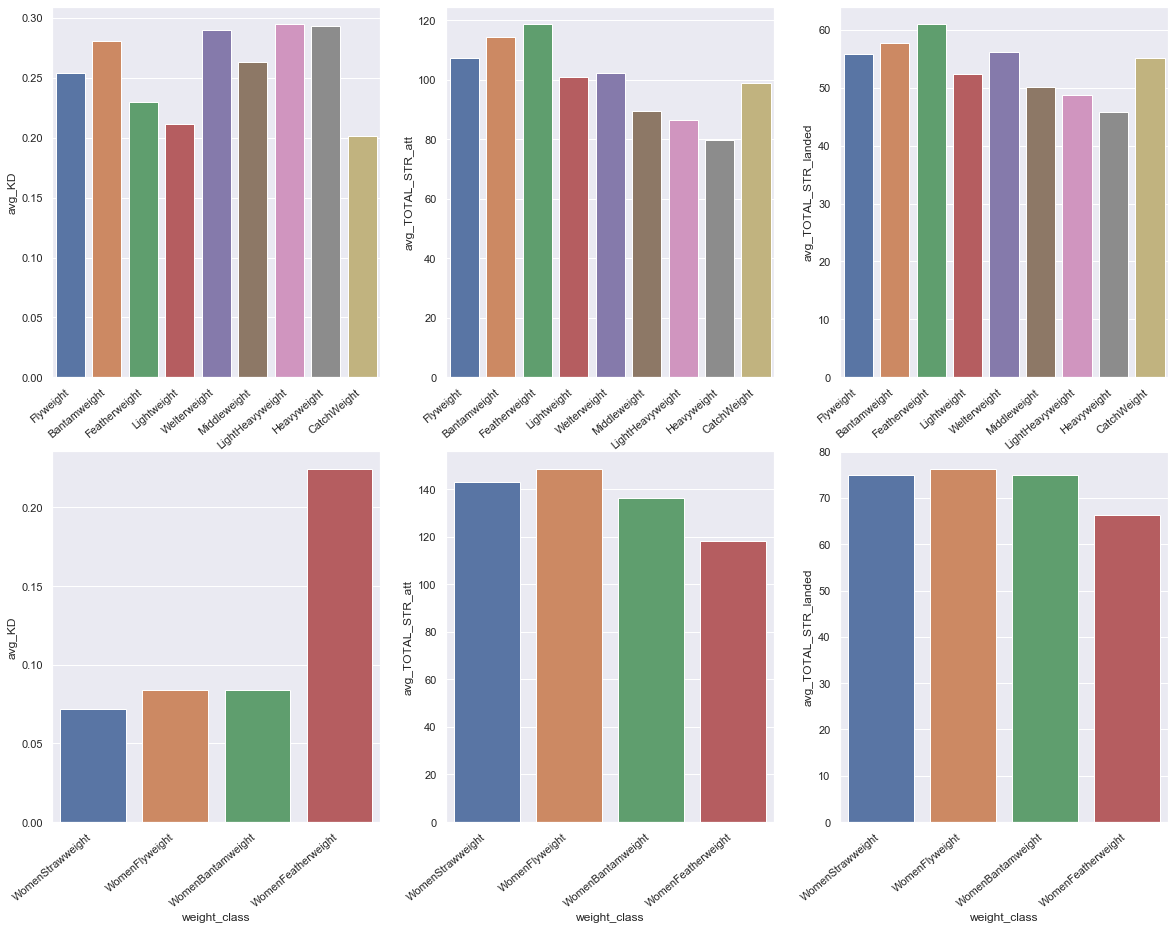

In [12]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,15)
fig, ax= plt.subplots(2, 3)

men_wc = by_wc[~by_wc.weight_class.str.contains('Women')]
women_wc = by_wc[by_wc.weight_class.str.contains('Women')]
ax1 = sns.barplot(data=men_wc, x = 'weight_class',y='avg_KD',order = ['Flyweight','Bantamweight','Featherweight','Lightweight',
                                                    'Welterweight','Middleweight','LightHeavyweight','Heavyweight','CatchWeight'], ax=ax[0,0])
ax2 = sns.barplot(data=men_wc, x = 'weight_class',y='avg_TOTAL_STR_att',order = ['Flyweight','Bantamweight','Featherweight','Lightweight',
                                                    'Welterweight','Middleweight','LightHeavyweight','Heavyweight','CatchWeight'],ax=ax[0,1])
ax3 = sns.barplot(data=men_wc, x = 'weight_class',y='avg_TOTAL_STR_landed',order = ['Flyweight','Bantamweight','Featherweight','Lightweight',
                                                    'Welterweight','Middleweight','LightHeavyweight','Heavyweight','CatchWeight'],ax=ax[0,2])
ax4 = sns.barplot(data=women_wc, x = 'weight_class',y='avg_KD',order = ['WomenStrawweight','WomenFlyweight','WomenBantamweight',
                                                                                      'WomenFeatherweight'],ax=ax[1,0])
ax5 = sns.barplot(data=women_wc, x = 'weight_class',y='avg_TOTAL_STR_att',order = ['WomenStrawweight','WomenFlyweight','WomenBantamweight',
                                                                                      'WomenFeatherweight'],ax=ax[1,1])
ax6 = sns.barplot(data=women_wc, x = 'weight_class',y='avg_TOTAL_STR_landed',order = ['WomenStrawweight','WomenFlyweight','WomenBantamweight',
                                                                                      'WomenFeatherweight'],ax=ax[1,2])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=40, ha="right")
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=40, ha="right")


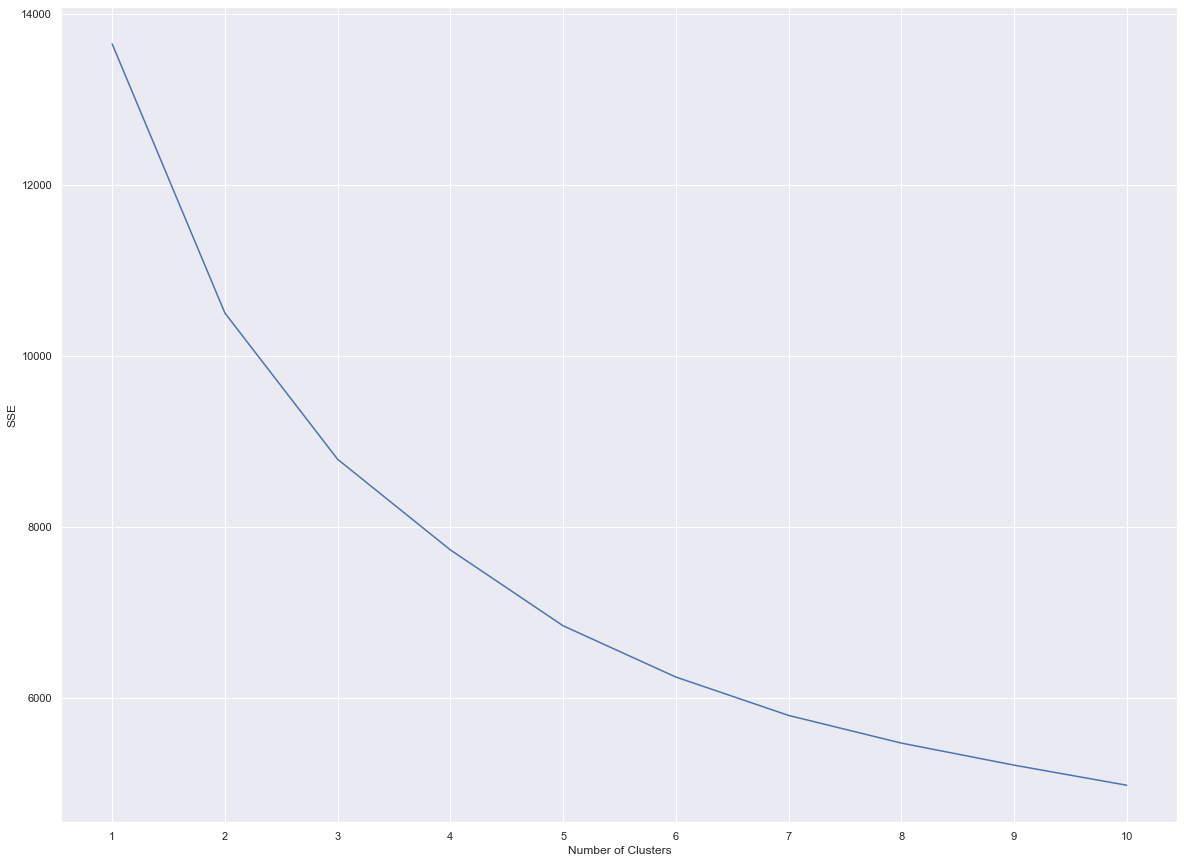

In [13]:
most_recent = combined_data.groupby('fighter').date.max().reset_index().merge(combined_data, on =['fighter','date'],how='inner')
most_recent = most_recent[~most_recent.fighter.duplicated()]
most_recent = most_recent[['fighter','date','avg_KD','avg_SIG_STR_att','avg_TD_att','avg_SUB_ATT','avg_TOTAL_STR_att','avg_CTRL_time(seconds)',
             'avg_CLINCH_att']].dropna()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(most_recent.drop(['fighter','date'],axis=1))
sse = []
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, init = 'random',n_init=10,random_state=1)
kmeans.fit(scaled_df)

KMeans(init='random', n_clusters=4, random_state=1)

In [15]:
most_recent['cluster'] = kmeans.labels_
fighter_stats = most_recent.merge(total,left_on='fighter',right_index=True)

fighter_stats[fighter_stats.cluster==0].describe()
## cluster 0 = knockout power
## cluster 1 = jack of all trades, master of none
## cluster 2 = grapplers
## cluster 3 = volume

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
count,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000,262.0,262.000000,262.000000,262.000000,262.000000,262.000000
mean,0.772750,75.247717,1.491058,0.238268,89.506689,91.213718,6.086608,0.0,4.362595,3.171756,0.133588,7.667939,0.535987
std,0.349661,37.234166,1.506506,0.443316,40.144338,81.767603,5.327633,0.0,3.723465,2.361303,0.351921,5.489841,0.235803
min,0.375000,8.000000,0.000000,0.000000,11.320312,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.500000,46.471838,0.281250,0.000000,59.502686,28.429688,2.515625,0.0,2.000000,2.000000,0.000000,4.000000,0.400000
50%,0.640137,69.328125,1.000000,0.003906,87.626587,66.392578,4.809479,0.0,3.000000,3.000000,0.000000,6.000000,0.545455
75%,1.000000,96.094849,2.250000,0.262138,112.734375,125.556454,7.890625,0.0,6.000000,4.000000,0.000000,10.000000,0.666667
max,2.376732,209.000000,8.000000,2.875000,254.500000,479.000000,39.000000,0.0,21.000000,14.000000,2.000000,31.000000,1.000000


In [16]:
fighter_stats[fighter_stats.cluster==1].describe()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.0,861.000000,861.000000,861.000000,861.000000,861.000000
mean,0.069526,42.408830,1.351338,0.327122,54.295268,59.928984,3.774812,1.0,2.783972,3.483159,0.121951,6.389082,0.308870
std,0.122842,27.271695,1.355747,0.541963,32.276164,62.472999,3.707523,0.0,3.666286,2.332532,0.351401,5.755549,0.250291
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,19.000000,0.125000,0.000000,28.031250,8.674988,1.000000,1.0,0.000000,2.000000,0.000000,2.000000,0.000000
50%,0.000000,40.000000,1.000000,0.011719,53.780472,40.500000,2.750000,1.0,1.000000,3.000000,0.000000,4.000000,0.333333
75%,0.088867,62.296875,2.023438,0.500000,76.769043,94.000000,5.328125,1.0,4.000000,4.000000,0.000000,8.000000,0.500000
max,0.500000,124.062500,6.218750,4.000000,211.210938,428.000000,26.031250,1.0,24.000000,17.000000,2.000000,41.000000,1.000000


In [17]:
fighter_stats[fighter_stats.cluster==2].describe()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.0,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.049779,70.791841,6.519355,0.689174,106.367554,290.925256,7.339900,2.0,3.767327,3.091584,0.108911,6.967822,0.459446
std,0.126707,32.054110,3.268391,0.826946,39.890412,127.870567,5.806179,0.0,4.014901,2.177947,0.363359,5.670126,0.257208
min,0.000000,4.000000,0.000000,0.000000,16.000000,9.000000,0.000000,2.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,47.375000,4.287659,0.016245,76.000000,207.046387,2.750000,2.0,1.000000,2.000000,0.000000,3.000000,0.333333
50%,0.000000,67.250000,5.955078,0.500000,102.000000,269.875000,5.750000,2.0,2.000000,2.000000,0.000000,5.000000,0.500000
75%,0.007812,91.019531,8.250000,1.000000,128.797775,364.750000,10.474435,2.0,5.000000,4.000000,0.000000,8.000000,0.637987
max,1.000000,195.410731,22.000000,5.000000,255.389159,780.000000,25.000000,2.0,21.000000,17.000000,3.000000,35.000000,1.000000


In [18]:
fighter_stats[fighter_stats.cluster==3].describe()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
count,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.000000,423.0,423.000000,423.000000,423.000000,423.000000,423.000000
mean,0.099608,146.978686,2.463500,0.172150,171.358151,108.652355,11.499669,3.0,4.321513,3.659574,0.146572,8.127660,0.447752
std,0.186721,52.066037,2.053734,0.345782,51.769565,87.120052,8.566416,0.0,4.219756,2.397164,0.392200,6.023868,0.246823
min,0.000000,53.000000,0.000000,0.000000,65.000000,0.000000,0.000000,3.0,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,111.232910,0.984909,0.000000,137.976562,38.593750,5.099599,3.0,1.000000,2.000000,0.000000,4.000000,0.285714
50%,0.000000,137.250000,2.000000,0.000523,161.007812,90.629395,9.500000,3.0,3.000000,3.000000,0.000000,6.000000,0.500000
75%,0.125000,173.506244,3.578125,0.205848,194.738281,163.268555,15.710083,3.0,7.000000,5.000000,0.000000,11.000000,0.628289
max,1.180664,456.000000,10.000000,3.085312,524.000000,460.388428,46.250000,3.0,23.000000,15.000000,2.000000,39.000000,1.000000


In [19]:
fighter_stats[fighter_stats.cluster==0].sort_values(by='Wins',ascending=False).head(5)

,fighter,date,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,cluster,Wins,Losses,draw,total_count,win_pct
372,Charles Oliveira,2022-10-22,0.773441,67.239534,2.495629,2.015901,80.733793,162.621334,10.375779,0,21.0,9.0,1.0,31.0,0.677419
668,Dustin Poirier,2022-11-12,0.633156,99.217367,1.220718,0.298865,110.071817,94.690692,5.311804,0,21.0,6.0,1.0,28.0,0.750000
1556,Matt Brown,2022-03-26,0.547032,47.887352,1.733897,0.018688,54.121929,121.713215,7.159499,0,16.0,13.0,0.0,29.0,0.551724
1983,Ryan Bader,2016-11-19,0.502232,45.649117,2.626293,0.037117,50.917313,44.856064,1.034428,0,15.0,5.0,0.0,20.0,0.750000
1534,Marlon Vera,2023-03-25,2.376732,184.347572,0.250048,0.323326,193.713110,63.722382,6.164949,0,14.0,7.0,0.0,21.0,0.666667


In [20]:
fighter_stats.groupby('cluster').mean()

,avg_KD,avg_SIG_STR_att,avg_TD_att,avg_SUB_ATT,avg_TOTAL_STR_att,avg_CTRL_time(seconds),avg_CLINCH_att,Wins,Losses,draw,total_count,win_pct
cluster,,,,,,,,,,,,
0,0.772750,75.247717,1.491058,0.238268,89.506689,91.213718,6.086608,4.362595,3.171756,0.133588,7.667939,0.535987
1,0.069526,42.408830,1.351338,0.327122,54.295268,59.928984,3.774812,2.783972,3.483159,0.121951,6.389082,0.308870
2,0.049779,70.791841,6.519355,0.689174,106.367554,290.925256,7.339900,3.767327,3.091584,0.108911,6.967822,0.459446
3,0.099608,146.978686,2.463500,0.172150,171.358151,108.652355,11.499669,4.321513,3.659574,0.146572,8.127660,0.447752


In [21]:
fighter_stats[fighter_stats.total_count >=10].sort_values(by='win_pct',ascending=False).head(15)[['fighter','cluster','Wins','win_pct']]

,fighter,cluster,Wins,win_pct
1334,Khabib Nurmagomedov,2,13.0,1.000000
922,Islam Makhachev,0,13.0,0.928571
86,Alexander Volkanovski,3,12.0,0.923077
1165,Jon Jones,3,21.0,0.913043
811,Georges St-Pierre,2,20.0,0.909091
188,Arnold Allen,1,10.0,0.909091
637,Don Frye,1,9.0,0.900000
113,Amanda Nunes,2,15.0,0.882353
1282,Kamaru Usman,3,15.0,0.882353
925,Israel Adesanya,3,13.0,0.866667


In [22]:
data['label'] = data.Winner.map({'Blue':1,'Red':0})


In [23]:
days = pd.DataFrame(columns=['date','fighter','days_since_last_fight'])
for i in total[total.total_count>1].index:
    df = combined_data[combined_data.fighter==i].sort_values(by='date')[['date','fighter']]
    df['days_since_last_fight'] = combined_data[combined_data.fighter==i].sort_values(by='date').date.diff()
    days = days.append(df)

In [24]:
X = data.merge(days,left_on=['B_fighter','date'],right_on=['fighter','date'],how='left').drop('fighter',axis=1).rename(
    {'days_since_last_fight':'B_days_since_last_fight'},axis=1)
X=X.merge(days,left_on=['R_fighter','date'],right_on=['fighter','date'],how='left').drop('fighter',axis=1).rename(
    {'days_since_last_fight':'R_days_since_last_fight'},axis=1)
X = X.dropna()


In [25]:
# Positive means the "B" fighter has a higher attribute than the "R" fighter
# Negative means vice versa
X['B_days_since_last_fight'] = X['B_days_since_last_fight'].apply(lambda x: x.days)
X['R_days_since_last_fight'] = X['R_days_since_last_fight'].apply(lambda x: x.days)
X['avg_KD_diff'] = X['B_avg_KD'] - X['R_avg_KD']
X['avg_opp_KD_diff'] = X['B_avg_opp_KD'] - X['R_avg_opp_KD']
X['avg_sig_str_pct_diff'] = X['B_avg_SIG_STR_pct'] - X['R_avg_SIG_STR_pct']
X['avg_opp_sig_str_pct_diff'] = X['B_avg_opp_SIG_STR_pct'] - X['R_avg_opp_SIG_STR_pct']
X['avg_TD_pct_diff'] = X['B_avg_TD_pct'] - X['R_avg_TD_pct']
X['avg_opp_TD_pct_diff'] = X['B_avg_opp_TD_pct'] - X['R_avg_opp_TD_pct']
X['avg_sub_att_pct_diff'] = X['B_avg_SUB_ATT'] - X['R_avg_SUB_ATT']
X['avg_opp_sub_att_pct_diff'] = X['B_avg_opp_SUB_ATT'] - X['R_avg_opp_SUB_ATT']
X['avg_rev_diff'] = X['B_avg_REV'] - X['R_avg_REV']
X['avg_opp_rev_diff'] = X['B_avg_opp_REV'] - X['R_avg_opp_REV']
X['avg_sig_str_att_diff'] = X['B_avg_SIG_STR_att'] - X['R_avg_SIG_STR_att']
X['avg_sig_str_landed_diff'] = X['B_avg_SIG_STR_landed'] - X['R_avg_SIG_STR_landed']
X['avg_opp_sig_str_att_diff'] = X['B_avg_opp_SIG_STR_att'] - X['R_avg_opp_SIG_STR_att']
X['avg_opp_sig_str_landed_diff'] = X['B_avg_opp_SIG_STR_landed'] - X['R_avg_opp_SIG_STR_landed']
X['avg_total_str_att_diff'] = X['B_avg_TOTAL_STR_att'] - X['R_avg_TOTAL_STR_att']
X['avg_total_str_landed_diff'] = X['B_avg_TOTAL_STR_landed'] - X['R_avg_TOTAL_STR_landed']
X['avg_opp_total_str_att_diff'] = X['B_avg_opp_TOTAL_STR_att'] - X['R_avg_opp_TOTAL_STR_att']
X['avg_opp_total_str_landed_diff'] = X['B_avg_opp_TOTAL_STR_landed'] - X['R_avg_opp_TOTAL_STR_landed']
X['avg_TD_att_diff'] = X['B_avg_TD_att'] - X['R_avg_TD_att']
X['avg_TD_landed_diff'] = X['B_avg_TD_landed'] - X['R_avg_TD_landed']
X['avg_opp_TD_att_diff'] = X['B_avg_opp_TD_att'] - X['R_avg_opp_TD_att']
X['avg_opp_TD_landed_diff'] = X['B_avg_opp_TD_landed'] - X['R_avg_opp_TD_landed']
X['avg_head_att_diff'] = X['B_avg_HEAD_att'] - X['R_avg_HEAD_att']
X['avg_head_landed_diff'] =  X['B_avg_HEAD_landed'] - X['R_avg_HEAD_landed']
X['avg_opp_head_att_diff'] =  X['B_avg_opp_HEAD_att'] - X['R_avg_opp_HEAD_att']
X['avg_opp_head_landed_diff'] =  X['B_avg_opp_HEAD_landed'] - X['R_avg_opp_HEAD_landed']
X['avg_body_att_diff'] = X['B_avg_BODY_att'] - X['R_avg_BODY_att']
X['avg_body_landed_diff'] =  X['B_avg_BODY_landed'] - X['R_avg_BODY_landed']
X['avg_opp_body_att_diff'] =  X['B_avg_opp_BODY_att'] - X['R_avg_opp_BODY_att']
X['avg_opp_body_landed_diff'] =  X['B_avg_opp_BODY_landed'] - X['R_avg_opp_BODY_landed']
X['avg_leg_att_diff'] = X['B_avg_LEG_att'] - X['R_avg_LEG_att']
X['avg_leg_landed_diff'] =  X['B_avg_LEG_landed'] - X['R_avg_LEG_landed']
X['avg_opp_leg_att_diff'] =  X['B_avg_opp_LEG_att'] - X['R_avg_opp_LEG_att']
X['avg_opp_leg_landed_diff'] =  X['B_avg_opp_LEG_landed'] - X['R_avg_opp_LEG_landed']
X['avg_distance_att_diff'] =X['B_avg_DISTANCE_att'] - X['R_avg_DISTANCE_att']
X['avg_distance_landed_diff'] =X['B_avg_DISTANCE_landed'] - X['R_avg_DISTANCE_landed']
X['avg_opp_distance_att_diff'] =X['B_avg_opp_DISTANCE_att'] - X['R_avg_opp_DISTANCE_att']
X['avg_opp_distance_landed_diff'] =X['B_avg_opp_DISTANCE_landed'] - X['R_avg_opp_DISTANCE_landed']
X['avg_clinch_att_diff'] = X['B_avg_CLINCH_att'] - X['R_avg_CLINCH_att']
X['avg_clinch_landed_diff'] = X['B_avg_CLINCH_landed'] - X['R_avg_CLINCH_landed']
X['avg_opp_clinch_att_diff'] = X['B_avg_opp_CLINCH_att'] - X['R_avg_opp_CLINCH_att']
X['avg_opp_clinch_landed_diff'] = X['B_avg_opp_CLINCH_landed'] - X['R_avg_opp_CLINCH_landed']
X['avg_ground_att_diff'] = X['B_avg_GROUND_att'] = X['R_avg_GROUND_att']
X['avg_ground_landed_diff'] = X['B_avg_GROUND_landed'] = X['R_avg_GROUND_landed']
X['avg_opp_ground_att_diff'] = X['B_avg_opp_GROUND_att'] = X['R_avg_opp_GROUND_att']
X['avg_opp_ground_landed_diff'] = X['B_avg_opp_GROUND_landed'] = X['R_avg_opp_GROUND_landed']
X['avg_ctrl_time_diff'] = X['B_avg_CTRL_time(seconds)'] = X['R_avg_CTRL_time(seconds)']
X['height_diff'] = X['B_Height_cms'] = X['R_Height_cms']
X['reach_diff'] = X['B_Reach_cms'] - X['R_Reach_cms']
X['age_diff'] = X['B_age'] - X['R_age']
X['total_time_fought_diff'] = X['B_total_time_fought(seconds)'] - X['R_total_time_fought(seconds)']
X['total_rounds_fought_diff']= X['B_total_rounds_fought'] = X['R_total_rounds_fought']
X['wins_diff'] = X['B_wins'] - X['R_wins']
X['loss_diff'] = X['B_losses'] - X['R_losses']
X['draw_diff'] = X['B_draw'] - X['R_draw']
X['total_title_bouts_diff'] = X['B_total_title_bouts'] - X['R_total_title_bouts']
X['curr_win_streak_diff'] = X['B_current_win_streak'] - X['R_current_win_streak']
X['curr_lose_streak_diff'] = X['B_current_lose_streak'] - X['R_current_lose_streak']
X['longest_win_streak_diff'] = X['B_longest_win_streak'] - X['R_longest_win_streak']
X['win_by_majority_diff'] = X['B_win_by_Decision_Majority'] - X['R_win_by_Decision_Majority']
X['win_by_dec_unanimous_diff'] = X['B_win_by_Decision_Unanimous'] - X['R_win_by_Decision_Unanimous']
X['win_by_tko_ko_diff'] = X['B_win_by_KO/TKO'] - X['R_win_by_KO/TKO']
X['win_by_sub_diff'] = X['B_win_by_Submission'] - X['R_win_by_Submission']
X['win_by_doctor_stop_diff'] = X['B_win_by_TKO_Doctor_Stoppage'] - X['R_win_by_TKO_Doctor_Stoppage']
X['win_by_split_decision_diff'] = X['B_win_by_Decision_Split'] - X['R_win_by_Decision_Split']
X['days_since_last_fight_diff'] = X['B_days_since_last_fight'] - X['R_days_since_last_fight']
X = pd.concat([X,pd.get_dummies(X[['B_Stance','R_Stance']])],axis=1)
X['title_bout'] = X.title_bout.map({False:0,True:1})
X= X.drop(['B_days_since_last_fight','Referee','location', 'Winner','weight_class','B_avg_KD', 'B_avg_opp_KD','B_avg_SIG_STR_pct', 'B_avg_opp_SIG_STR_pct', 
           'B_avg_TD_pct','B_avg_opp_TD_pct', 'B_avg_SUB_ATT', 'R_total_rounds_fought','R_wins','B_wins','B_Stance','R_Stance',
           'B_avg_opp_SUB_ATT', 'B_avg_REV','B_avg_opp_REV', 'B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed','B_avg_opp_SIG_STR_att', 
           'B_avg_opp_SIG_STR_landed', 'B_avg_TOTAL_STR_att', 'B_avg_TOTAL_STR_landed','B_avg_opp_TOTAL_STR_att', 'B_avg_opp_TOTAL_STR_landed', 
           'B_avg_TD_att','B_avg_TD_landed', 'B_avg_opp_TD_att', 'B_avg_opp_TD_landed','B_avg_HEAD_att', 'B_avg_HEAD_landed',
           'B_avg_opp_HEAD_att','B_avg_opp_HEAD_landed', 'B_avg_BODY_att', 'B_avg_BODY_landed','B_avg_opp_BODY_att', 'B_avg_opp_BODY_landed',
           'B_avg_LEG_att','B_avg_LEG_landed','B_avg_opp_LEG_att', 'B_avg_opp_LEG_landed', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed', 
           'B_avg_opp_DISTANCE_att','B_avg_opp_DISTANCE_landed', 'B_avg_CLINCH_att', 'B_avg_CLINCH_landed','B_avg_opp_CLINCH_att', 
           'B_avg_opp_CLINCH_landed', 'B_avg_GROUND_att','B_avg_GROUND_landed', 'B_avg_opp_GROUND_att','B_avg_opp_GROUND_landed', 
           'B_avg_CTRL_time(seconds)', 'B_avg_opp_CTRL_time(seconds)','B_Height_cms','B_Reach_cms', 'B_Weight_lbs','R_avg_KD', 'R_avg_opp_KD',
       'R_avg_SIG_STR_pct', 'R_avg_opp_SIG_STR_pct', 'R_avg_TD_pct','R_avg_opp_TD_pct', 'R_avg_SUB_ATT', 'R_avg_opp_SUB_ATT', 'R_avg_REV',
       'R_avg_opp_REV', 'R_avg_SIG_STR_att', 'R_avg_SIG_STR_landed', 'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed','R_avg_TOTAL_STR_att', 
        'R_avg_TOTAL_STR_landed','R_avg_opp_TOTAL_STR_att', 'R_avg_opp_TOTAL_STR_landed', 'R_avg_TD_att','R_avg_TD_landed', 'R_avg_opp_TD_att',
           'R_avg_opp_TD_landed','R_avg_HEAD_att', 'R_avg_HEAD_landed', 'R_avg_opp_HEAD_att','R_avg_opp_HEAD_landed', 'R_avg_BODY_att', 
           'R_avg_BODY_landed','R_avg_opp_BODY_att', 'R_avg_opp_BODY_landed', 'R_avg_LEG_att','R_avg_LEG_landed', 'R_avg_opp_LEG_att', 
           'R_avg_opp_LEG_landed','R_avg_DISTANCE_att', 'R_avg_DISTANCE_landed', 'R_avg_opp_DISTANCE_att','R_avg_opp_DISTANCE_landed', 
           'R_avg_CLINCH_att', 'R_avg_CLINCH_landed','R_avg_opp_CLINCH_att', 'R_avg_opp_CLINCH_landed', 'R_avg_GROUND_att','R_avg_GROUND_landed', 
           'R_avg_opp_GROUND_att','B_age','R_age', 'B_total_time_fought(seconds)', 'R_total_time_fought(seconds)', 'B_total_rounds_fought',
       'R_avg_opp_GROUND_landed','R_avg_CTRL_time(seconds)', 'R_avg_opp_CTRL_time(seconds)','R_Height_cms','R_Reach_cms', 'R_Weight_lbs',
          'B_total_title_bouts','R_total_title_bouts','B_losses','R_losses','B_draw','R_draw','B_current_win_streak',
          'R_current_win_streak','B_current_lose_streak','R_current_lose_streak','B_longest_win_streak','R_longest_win_streak',
          'B_win_by_Decision_Majority','R_win_by_Decision_Majority','B_win_by_Decision_Unanimous','R_win_by_Decision_Unanimous',
          'B_win_by_KO/TKO','R_win_by_KO/TKO','B_win_by_Submission','R_win_by_Submission','B_win_by_TKO_Doctor_Stoppage',
          'R_win_by_TKO_Doctor_Stoppage','B_win_by_Decision_Split','R_win_by_Decision_Split','R_days_since_last_fight'],axis=1)

In [26]:
X.columns

Index(['R_fighter', 'B_fighter', 'date', 'title_bout', 'label', 'avg_KD_diff',
       'avg_opp_KD_diff', 'avg_sig_str_pct_diff', 'avg_opp_sig_str_pct_diff',
       'avg_TD_pct_diff', 'avg_opp_TD_pct_diff', 'avg_sub_att_pct_diff',
       'avg_opp_sub_att_pct_diff', 'avg_rev_diff', 'avg_opp_rev_diff',
       'avg_sig_str_att_diff', 'avg_sig_str_landed_diff',
       'avg_opp_sig_str_att_diff', 'avg_opp_sig_str_landed_diff',
       'avg_total_str_att_diff', 'avg_total_str_landed_diff',
       'avg_opp_total_str_att_diff', 'avg_opp_total_str_landed_diff',
       'avg_TD_att_diff', 'avg_TD_landed_diff', 'avg_opp_TD_att_diff',
       'avg_opp_TD_landed_diff', 'avg_head_att_diff', 'avg_head_landed_diff',
       'avg_opp_head_att_diff', 'avg_opp_head_landed_diff',
       'avg_body_att_diff', 'avg_body_landed_diff', 'avg_opp_body_att_diff',
       'avg_opp_body_landed_diff', 'avg_leg_att_diff', 'avg_leg_landed_diff',
       'avg_opp_leg_att_diff', 'avg_opp_leg_landed_diff',
       'avg_distance_

In [27]:
from dateutil.parser import parse
import requests
from bs4 import BeautifulSoup

page_list = []
date_list = []
cur_page ='https://www.bestfightodds.com/events/ufc-284-makhachev-vs-volkanovski-2710'
checked_fighter_list = []
not_checked_fighter_list = []
html = requests.get(cur_page)
bs = BeautifulSoup(html.text)

In [28]:
possible_fighters = bs.find_all('a')
for f in possible_fighters:
    possible_link = (f.attrs['href'])
    if "/fighters/" in possible_link:
        #OK these are all good.
        if possible_link not in checked_fighter_list:
            if possible_link not in not_checked_fighter_list:
                not_checked_fighter_list.append(possible_link)
                
                

while len(not_checked_fighter_list) > 0:
    f = not_checked_fighter_list.pop(0)
    checked_fighter_list.append(f)
    html = requests.get('https://www.bestfightodds.com' + f)
    bs = BeautifulSoup(html.text)
    possible_fighters = bs.find_all('a')
    count = 0
    #See if it looks like a fighter.  If so 
    for i in possible_fighters:
        if count ==2:
            count = 0
            continue
        possible_link = (i.attrs['href'])
        if "/events/" in possible_link:
            if 'ufc' not in possible_link:
                count+=2
                continue
        if "/fighters/" in possible_link:
            #OK these are all good.
            if possible_link not in checked_fighter_list and possible_link not in not_checked_fighter_list:
                not_checked_fighter_list.append(possible_link)    
    possible_events = bs.find_all('tr', {'class':'event-header'})
    for e in possible_events:
        e_text = e.get_text()
        if 'UFC' in e_text:
                #print(e_text)
            d = parse((' '.join(e_text.split(' ')[-3:])))
            possible_link = e.find('a')
            l = (possible_link.attrs['href'])
            page_list.append(l)
            date_list.append(d)
print(len(page_list))

13287


In [29]:
num_of_events = len(set(date_list))
print(f"Total Number of events: {num_of_events}")
print(f"Not Checked fighters: {len(not_checked_fighter_list)}")
print(f"checked fighters: {len(checked_fighter_list)}")

Total Number of events: 573
Not Checked fighters: 0
checked fighters: 2255


In [30]:
combined_data['YM'] = combined_data.date.apply(lambda x: x.strftime('%Y/%m'))

In [31]:
df_links = pd.DataFrame(list(zip(date_list, page_list)), columns=['date', 'link']).dropna()
# df_links = df_links[df_links.date < '2023-01-01']
df_links = df_links[~df_links.duplicated()]
event_date_list = df_links['date'].tolist()
link_list = df_links['link'].tolist()


In [32]:
b_error_names = []
r_error_names = []
b_error_links = []
r_error_links =[]

odds_df = pd.DataFrame(columns=['R_fighter','B_fighter','R_odds','B_odds','date'])
for l, d in zip(link_list, event_date_list):
    try:
        html = requests.get('https://www.bestfightodds.com' + l)
        bs = BeautifulSoup(html.text)
        fighters=set([' '.join(i.attrs['href'].split('/')[-1].replace('-',' ').split(' ')[:-1]) for i in bs.find_all('a') 
                      if i.attrs['href'].find('/fighters/') > -1])
        all_rows = bs.find_all('table')
        filtered_set = combined_data[(combined_data.fighter.isin(fighters)) & (combined_data.YM ==pd.to_datetime(d).strftime('%Y/%m'))]
        event = data[data.date==filtered_set.date.values[0]]
        event_b_fighter_list = event['B_fighter'].tolist()
        event_r_fighter_list = event['R_fighter'].tolist()
        fighters = [i for i in all_rows[1].find_all('th',scope='row') if len(i.find_all('a',href=True)) > 0]
        f_names = [f.get_text()for f in fighters]
        f_last_names = [i.split(' ')[-1] for i in f_names]
        f_first_names = [i.split(' ')[0] for i in f_names]
        odds=[]
        for f in fighters:
            try:
                odds.append([i.get_text().strip().encode("ascii", "ignore").decode() for i in f.next_siblings if i.get_text() !=''][0])
            except:
                odds.append('NA')
        odds_dict = dict(zip(f_names,odds))
        odds_dict_last = dict(zip(f_last_names,odds))
        odds_dict_first = dict(zip(f_first_names,odds))
        for b, r in zip(event_b_fighter_list, event_r_fighter_list):
            new_r=r.replace('-',' ')
            new_b=b.replace('-',' ')
            r_last_name = new_r.split(' ')[-1]
            b_last_name = new_b.split(' ')[-1]
            r_first_name = r.split(' ')[0]
            b_first_name = b.split(' ')[0]
            try:
                try:
                    r_odds = odds_dict[r]
                except:
                    try:
                        r_odds = odds_dict[new_r]
                    except:
                        try:
                            r_odds = odds_dict_last[r_last_name]
                        except:
                            r_odds = odds_dict_first[r_first_name]
            except:
                r_error_names.append(r)
                r_error_links.append(l)
            try:
                try:
                    b_odds=odds_dict[b]
                except:
                    try:
                        b_odds =odds_dict[new_b]
                    except:
                        try:
                            b_odds=odds_dict_last[b_last_name]
                        except:
                            b_odds=odds_dict_first[b_first_name]
            except:
                r_error_names.append(r)
                r_error_links.append(l)
            odds_df = odds_df.append(pd.DataFrame([r,b,r_odds,b_odds,d],index=['R_fighter','B_fighter','R_odds','B_odds','date']).T)
    except:
        print(d)

2023-06-17 00:00:00
2023-06-03 00:00:00
2023-06-10 00:00:00
2023-05-20 00:00:00
2007-06-23 00:00:00
2023-05-13 00:00:00
2007-06-16 00:00:00
2012-03-30 00:00:00
2012-05-18 00:00:00
2012-05-04 00:00:00
2012-05-25 00:00:00
2012-05-11 00:00:00
2012-04-06 00:00:00
2012-03-23 00:00:00
2012-04-13 00:00:00
2023-07-01 00:00:00
2012-04-27 00:00:00
2012-04-20 00:00:00
2021-12-31 00:00:00
2022-12-15 00:00:00


In [33]:
odds_df = odds_df.reset_index().drop('index',axis=1)
odds_df['date'] = pd.to_datetime(odds_df.date)
odds_df['month'] = odds_df.date.apply(lambda x: x.strftime('%Y/%m'))


In [34]:
X['month'] = X.date.apply(lambda x: x.strftime('%Y/%m'))
X = X.merge(odds_df, on=['R_fighter','B_fighter','month'],how='left').dropna()
X = X.drop(['R_fighter','B_fighter','date_x','date_y','month'],axis=1)
X[['R_odds','B_odds']] = X[['R_odds','B_odds']].astype(int)


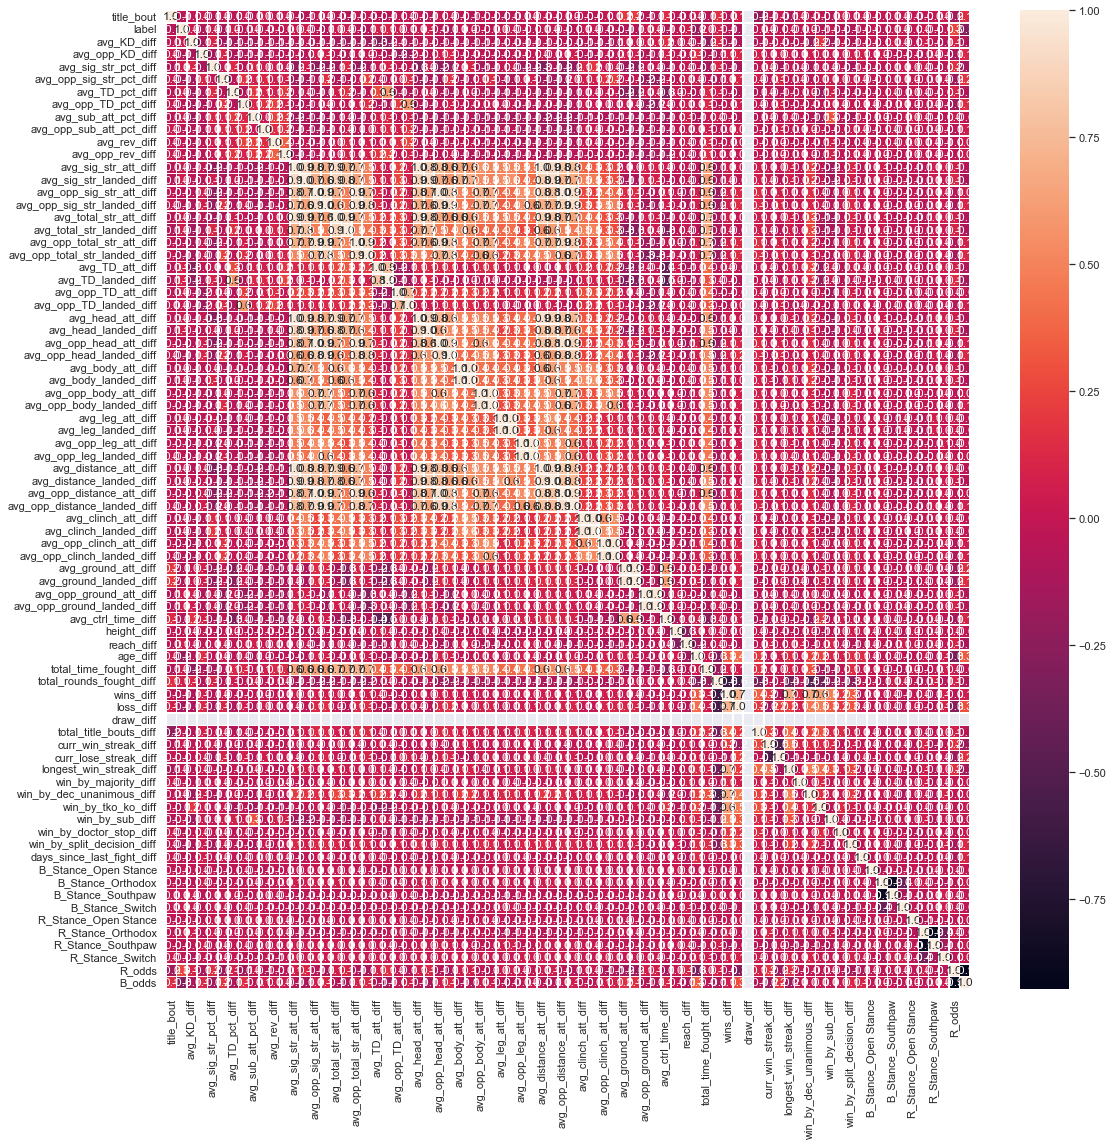

In [35]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [36]:
X[['R_odds','B_odds','label']]

,R_odds,B_odds,label
0,140,-165,1.0
1,125,-150,0.0
2,-185,650,1.0
3,-120,100,0.0
4,-185,150,0.0
...,...,...,...
4733,-320,260,0.0
4734,-225,185,0.0
4735,-230,210,0.0
4736,-265,225,0.0


In [37]:
import random
preds = []
for i in X[['R_odds','B_odds','label']].values:
    if i[0] < i[1]:
        preds.append(0)
    elif i[0] > i[1]:
        preds.append(1)
    else:
        preds.append(random.choice([0,1]))
print('Accuracy of Naive Approach: ',(preds==X.label).sum() / len(X))


Accuracy of Naive Approach:  0.6310299869621904


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from collections import Counter
from sklearn.metrics import confusion_matrix
import time
import xgboost as xgb

import itertools
from sklearn.model_selection import GridSearchCV
y = X.label
X=X.drop(['label','B_odds','R_odds'],axis=1)
X_train,X_test, y_train,y_test= train_test_split(X, y, test_size = 0.2, random_state = 0)


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [40]:
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    SVC(kernel="linear"),
    GaussianNB(),
    LogisticRegression(),
    xgb.XGBClassifier()
    ]
# Naive Train Accuracy
algo = []
scores = []
for clf in classifiers:
    algo.append(clf.__class__.__name__)
    scores.append(cross_val_score(clf,X_train_scaled,y_train, cv=5).mean())
Naivescore_df_Train = pd.DataFrame({'Algorithm': algo, 'Score': scores}).set_index('Algorithm')


C:\Users\ctran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
C:\Users\ctran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [41]:
list(zip(algo,scores))

[('DecisionTreeClassifier', 0.5900632706035042),
 ('RandomForestClassifier', 0.6547143236387234),
 ('KNeighborsClassifier', 0.5664227036752993),
 ('SVC', 0.622928588283877),
 ('GaussianNB', 0.5408751696065129),
 ('LogisticRegression', 0.6196747242050618),
 ('XGBClassifier', 0.6272775205002655)]

In [42]:
# Define the range of number of selected features to try
min_features = 5
max_features = X_train_scaled.shape[1]

# # Define the step size for increasing the number of selected features
step_size = 5

# # Create a logistic regression model
rfc = RandomForestClassifier()

param_grid = {'n_features_to_select':np.arange(min_features,max_features+step_size,step_size)}
selector = RFECV(rfc, scoring='accuracy', cv=5)
selector.fit(X_train_scaled, y_train)

# selector = RFE(rfc)
# grid_search = GridSearchCV(estimator=selector, param_grid=param_grid, cv=5)
# grid_search.fit(X_train_scaled,y_train)


RFECV(cv=5, estimator=RandomForestClassifier(), scoring='accuracy')

In [43]:
print("Optimal number of features: %d" % selector.n_features_)
print("Selected features: %s" % X_train.columns[selector.support_])

Optimal number of features: 50
Selected features: Index(['avg_KD_diff', 'avg_opp_KD_diff', 'avg_sig_str_pct_diff',
       'avg_opp_sig_str_pct_diff', 'avg_TD_pct_diff', 'avg_opp_TD_pct_diff',
       'avg_sub_att_pct_diff', 'avg_opp_sub_att_pct_diff', 'avg_rev_diff',
       'avg_opp_rev_diff', 'avg_sig_str_landed_diff',
       'avg_opp_sig_str_att_diff', 'avg_opp_sig_str_landed_diff',
       'avg_total_str_att_diff', 'avg_total_str_landed_diff',
       'avg_opp_total_str_att_diff', 'avg_opp_total_str_landed_diff',
       'avg_TD_att_diff', 'avg_TD_landed_diff', 'avg_opp_TD_att_diff',
       'avg_opp_TD_landed_diff', 'avg_head_att_diff', 'avg_head_landed_diff',
       'avg_opp_head_att_diff', 'avg_opp_head_landed_diff',
       'avg_body_att_diff', 'avg_body_landed_diff', 'avg_opp_body_att_diff',
       'avg_opp_body_landed_diff', 'avg_leg_att_diff', 'avg_leg_landed_diff',
       'avg_opp_leg_att_diff', 'avg_opp_leg_landed_diff',
       'avg_distance_att_diff', 'avg_distance_landed_diff',

C:\Users\ctran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


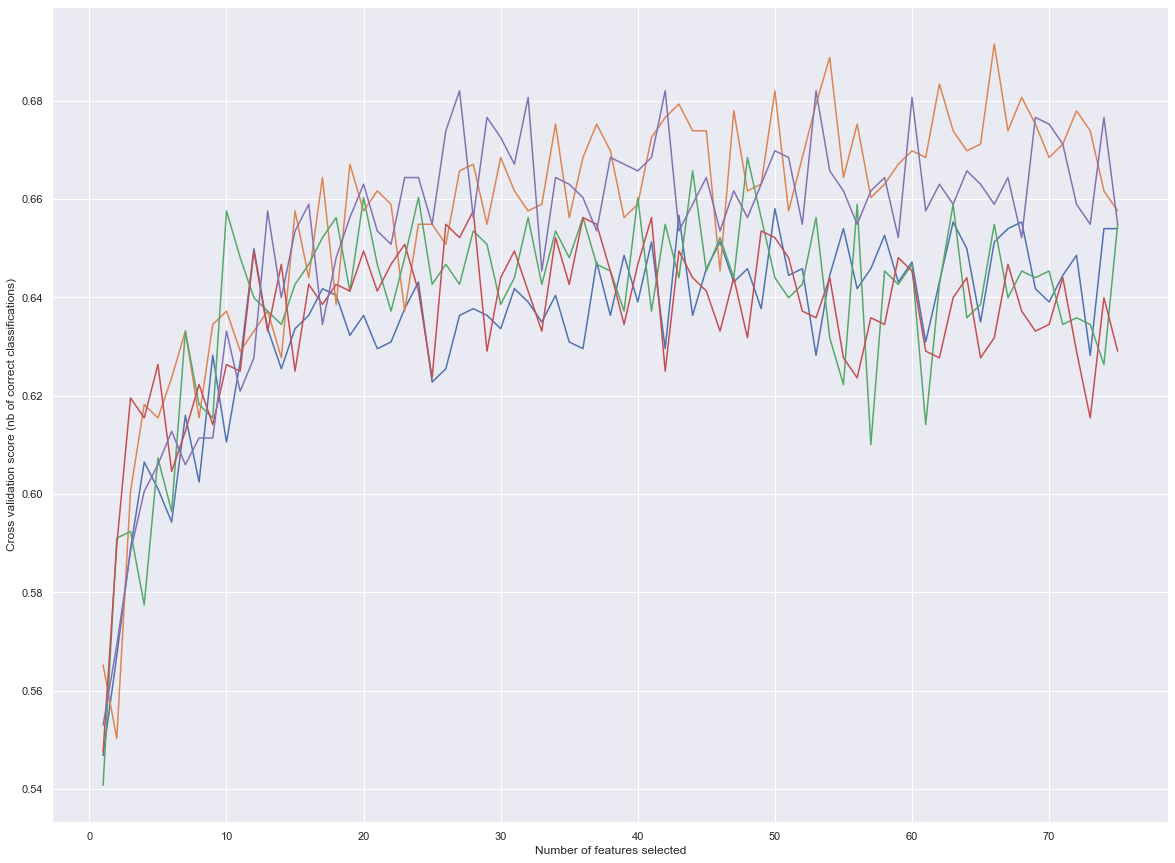

In [44]:
# # # Print the best parameters and score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(selector.grid_scores_) + 1),selector.grid_scores_)
plt.show()


In [45]:
# rfc = RandomForestClassifier()
# selector = RFE(rfc, n_features_to_select=grid_search.best_params_['n_features_to_select'], step=1)

#     # Fit the feature selector to the training data
# selector.fit(X_train_scaled, y_train)

    # Transform the training and test data to include only the selected features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500, 1000],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the Random Forest Classifier
rfc = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_selected, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 1000}
Best score:  0.6647719898531059


In [46]:
params = grid_search.best_params_
rfc = RandomForestClassifier(max_depth= params['max_depth'],max_features=params['max_features'],
        min_samples_leaf=params['min_samples_leaf'],min_samples_split=params['min_samples_split'],n_estimators=params['n_estimators'] )
rfc.fit(X_train_selected,y_train)
preds = rfc.predict(X_test_selected)

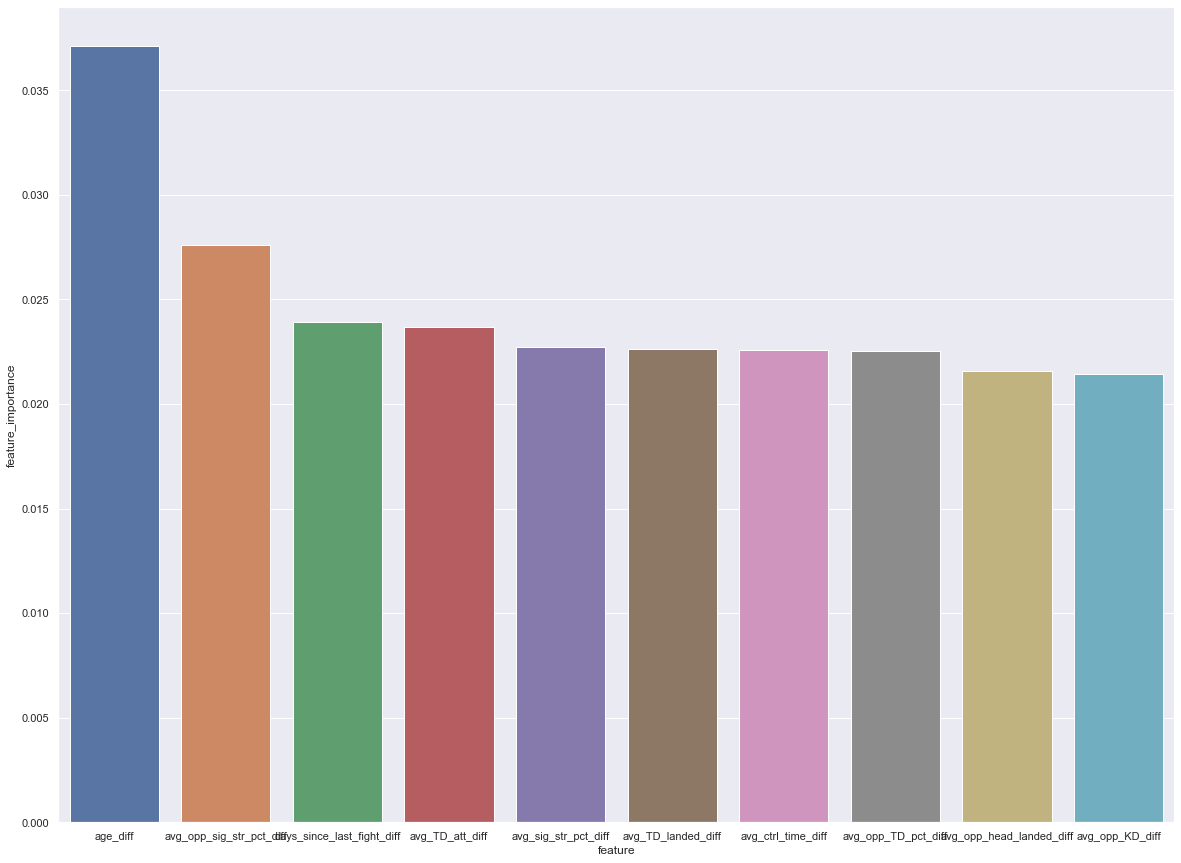

In [47]:
sns.barplot(data =pd.DataFrame([rfc.feature_importances_,X_train.columns[selector.support_]]).T.rename({0:'feature_importance',1:'feature'},
axis=1).sort_values(by='feature_importance',ascending=False).iloc[:10],x='feature',y='feature_importance')


In [48]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, plot_confusion_matrix
precision = precision_score(y_test,preds)
recall = recall_score(y_test,preds)
accuracy = accuracy_score(y_test,preds)
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
specificity = tn / (tn + fp)
# print the results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Specificity: {specificity:.3f}")

Accuracy: 0.624
Precision: 0.649
Recall: 0.246
Specificity: 0.902


Text(0.5, 1, 'Confusion Matrix')

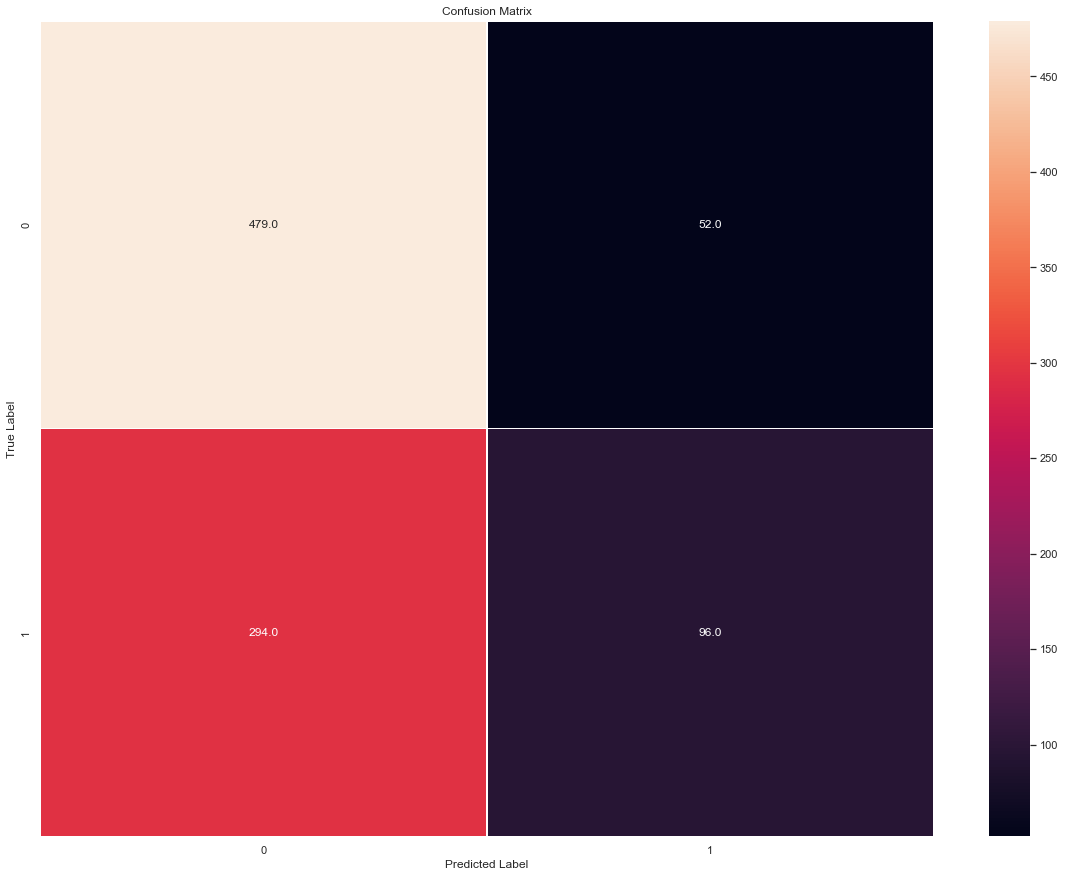

In [49]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, linewidths=.5, fmt= '.1f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

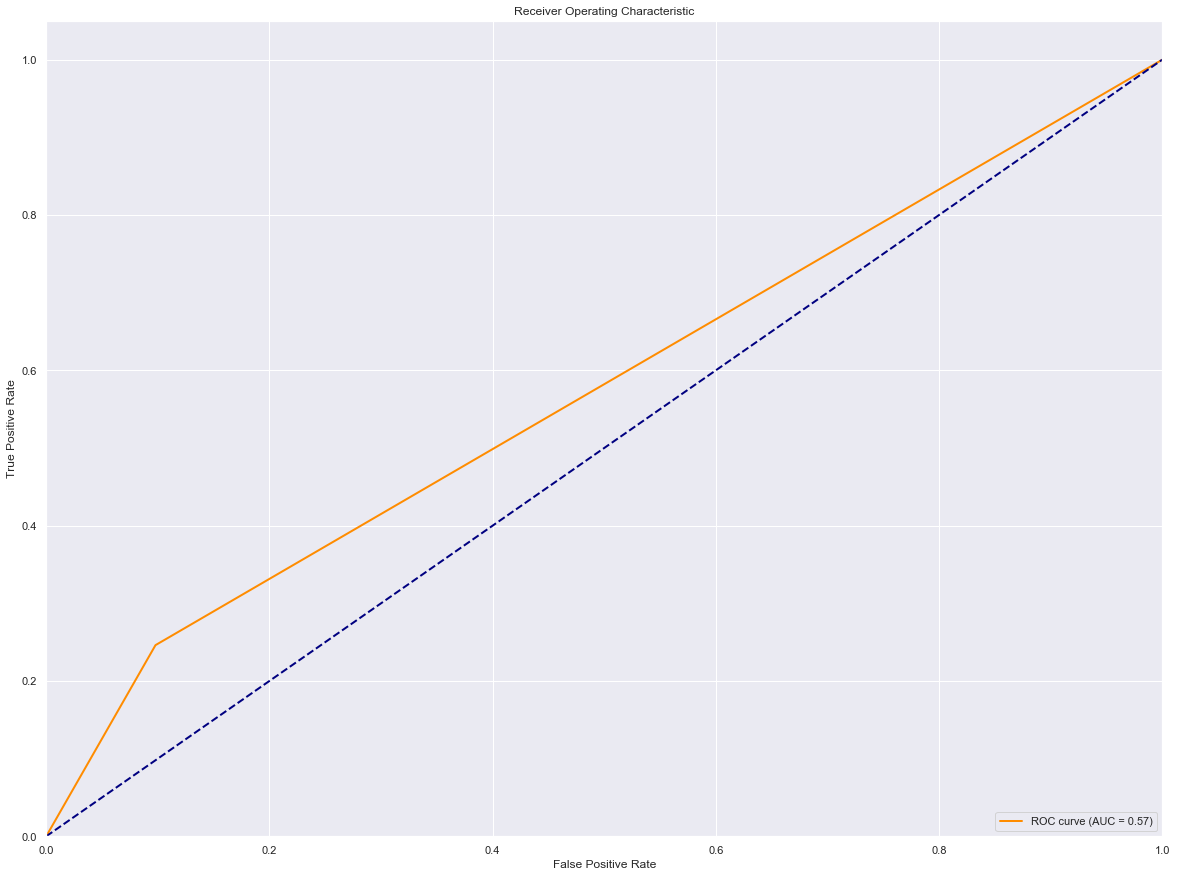

In [50]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [109]:
def make_soup(url: str) -> BeautifulSoup:
    source_code = requests.get(url, allow_redirects=False)
    plain_text = source_code.text.encode("ascii", "replace")
    return BeautifulSoup(plain_text, "html.parser")
all_events_url="http://ufcstats.com/statistics/events/completed?page=all"
html = requests.get(all_events_url)
soup = BeautifulSoup(html.text)
all_event_links = []
for link in soup.findAll("td", {"class": "b-statistics__table-col"}):
    for href in link.findAll("a"):
        foo = href.get("href")
        all_event_links.append(foo)

In [110]:
event_and_fight_links = {}
event_links = all_event_links
l = len(event_links)

for index, link in enumerate(event_links):
    event_fights = []
    soup = make_soup(link)
    for row in soup.findAll(
        "tr",
        {
            "class": "b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"
        },
    ):
        href = row.get("data-link")
        event_fights.append(href)
    event_and_fight_links[link] = event_fights

In [ ]:
fight = event_and_fight_links[list(event_and_fight_links)[0]][0]
fight_soup = make_soup(fight)
fighter_links = fight_soup.find_all('a',{'class':"b-link b-fight-details__person-link"})
num_of_fights_r = len(make_soup(fighter_links[0]['href']).findAll('tr', {"class":"b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"}))
num_of_fights_b = len(make_soup(fighter_links[1]['href']).findAll('tr', {"class":"b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"}))

In [ ]:
make_soup(fighter_links[0]['href']).findAll('tr', {"class":"b-fight-details__table-row b-fight-details__table-row__hover js-fight-details-click"})[0]['data-link']

In [ ]:
vals = []
for i in make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('p', {"class": "b-fight-details__table-text"}):
    vals.append(i.text.strip())

In [ ]:
cols_list = []
for i in make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('th', {"class":"b-fight-details__table-col"}):
    cols_list.append(i.text.strip())

In [ ]:
a = dict()
a[vals[0]] = vals[2:][::2]
a[vals[1]] = vals[2:][1::2]

In [ ]:
misc=make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('i', {'class':"b-fight-details__text-item"})
fight_round = int(misc[0].text.strip()[-1])
method = make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('i', {'style':"font-style: normal"})[0].text.strip()
fight_time =misc[1].text.strip().split(' ')[-1]
title_fight = 'Title' in make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('i', {'class':"b-fight-details__fight-title"})[0].text.strip()
weight_class = re.findall('[A-Za-z]*weight',make_soup('http://ufcstats.com/fight-details/1f0d4572e0facbea').findAll('i', {'class':"b-fight-details__fight-title"})[0].text.strip())[0]

In [ ]:
all_lists = []
final_lists = []
for fighter in a.keys():
    sub_list = []
    for i in a[fighter]:
        if i ==fighter:
            all_lists.append(sub_list)
            sub_list = []
        else:
            sub_list.append(i)
    final_lists.append(all_lists[::fight_round+1])
    all_lists = []

In [ ]:
new_df = pd.DataFrame(columns=data.columns)
R = combined_data[combined_data.fighter==vals[0]].sort_values(by='date',ascending=False).iloc[1]
B = combined_data[combined_data.fighter==vals[1]].sort_values(by='date',ascending=False).iloc[1]

new_df['R_fighter'] = vals[0]
new_df['B_fighter'] = vals[1]
new_df['title_bout'] = title_fight
new_df['weight_class'] = weight_class
# new_df['B_avg_KD'] = 
row = [vals[0],vals[1],'NA','NA','NA','NA',title_fight,weight_class,]

In [ ]:
B['avg_KD']
final_lists[1][0]

In [ ]:
fighter_links